# 分類(classification)

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
%matplotlib inline

scikit-learnの iris (あやめ）のデータを使用します．

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

データセットの説明は DESCR (description) から見ることができます．

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
#from IPython.display import Image, display_jpg
#Image(url='https://en.wikipedia.org/wiki/Iris_virginica#/media/File:Iris_virginica_2.jpg')
#![Qiita](https://qiita-image-store.s3.amazonaws.com/0/45617/015bd058-7ea0-e6a5-b9cb-36a4fb38e59c.png "Qiita")

 petal width で Virginica であるかどうか分類する問題を考えます．

In [6]:
# petal width
X = iris['data'][:, 3:]

target でVirginica は 2で示されています．

In [7]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Virginica を１，それ以外を０とします．

In [8]:
Y = (iris["target"] == 2).astype(np.int)

データを訓練データとテストデータに分けます．

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## ロジスティクス回帰

訓練データで学習します．

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

求めたロジスティクス曲線と判定領域を示します．

分類性能を評価します．

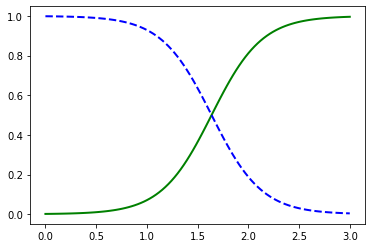

In [11]:
X_new = np.linspace(0, 3, 100).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [12]:
print('正解率(train):{:.3f}'.format(log_reg.score(X_train, Y_train)))
print('正解率(test):{:.3f}'.format(log_reg.score(X_test, Y_test)))

正解率(train):0.958
正解率(test):0.967


## k-NN

近傍数を1から４まで変化させ正答率を描画します．

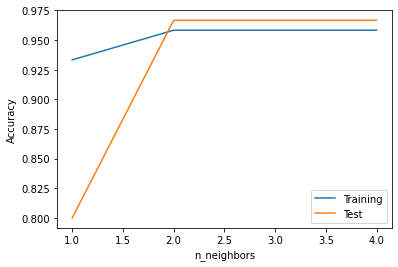

In [13]:
from sklearn.neighbors import  KNeighborsClassifier

# グラフ用のリスト
training_accuracy = []
test_accuracy =[]

# 学習
for n_neighbors in range(1,5):
    knn_cls = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_cls.fit(X_train,Y_train)
    training_accuracy.append(knn_cls.score(X_train, Y_train))
    test_accuracy.append(knn_cls.score(X_test, Y_test))

# グラフを描画
plt.plot(range(1,5), training_accuracy, label='Training')
plt.plot(range(1,5), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

## サポートベクターマシン

iris のデータセットで　petal length と petal width でSetosa と Versicolor を分類します．

In [ ]:
X = iris['data'][:, (2, 3)]

Setosa と Versicolor のデータを抜き出します．

In [ ]:
Y= iris['target']
setosa_or_versicolor = (Y == 0) | (Y == 1)
X = X[setosa_or_versicolor]
Y = Y[setosa_or_versicolor]

データを図示します．

In [ ]:
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], 'yo', label='Setosa')
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], 'bs', label='Versicolor')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.axis([0, 5.5, 0, 2])
plt.legend(loc='lower right')
#save_fig('svm_data')

サポートベクターマシンで学習します．

In [ ]:
from sklearn.svm import SVC

svm_cls = SVC(kernel='linear')
svm_cls.fit(X, Y)

学習結果を図示します．

In [ ]:
w = svm_cls.coef_[0]
b = svm_cls.intercept_[0]

x0 = np.linspace(0, 5.5, 100)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], 'yo', label='Setosa')
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], 'bs', label='Versicolor')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.axis([0, 5.5, 0, 2])
plt.legend(loc='lower right')
plt.plot(x0, decision_boundary, 'k-')
#save_fig('svm_result')

Copyright. All rights reserved. Shuichi OHNO, 2020.